In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
bicycle = pd.read_csv('bicycle_dataset/train.csv')

In [3]:
bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [4]:
# missing data check
def check_missing_col(dataframe):
    counted_missing_col=0
    for i,col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은:{col}입니다.')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')
            
        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다.')

In [5]:
check_missing_col(bicycle)

결측치가 존재하지 않습니다.


In [6]:
bicycle.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [10]:
def seperate_datetime(dateframe):
    year = []
    month = []
    day = []
    
    for date in dateframe.date_time:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

In [11]:
year, month, day = seperate_datetime(bicycle)

In [12]:
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

In [13]:
# test, target seperate
X = bicycle.drop(['date_time', 'number_of_rentals'], axis=1)
y = bicycle.number_of_rentals

### Modeling
- Linear regression

In [47]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [55]:
lg = LinearRegression()
lg.fit(X,y)
print(lg.score(X, y))
y_hat = lg.predict(X)
nmae = np.mean(abs(y_hat - y)/y)
print(f'모델 NMAE: {nmae}')

0.8557444087319119


In [59]:
lasso = Lasso()
lasso.fit(X, y)
print(lasso.score(X, y))
y_hat = lasso.predict(X)
nmae = np.mean(abs(y_hat - y)/y)
print(f'모델 NMAE: {nmae}')

0.8557434117961096


In [68]:
ridge = Ridge()
ridge.fit(X, y)
print(ridge.score(X, y))
y_hat = ridge.predict(X)
nmae = np.mean(abs(y_hat - y)/y)
print(f'모델 NMAE: {nmae}')

0.8554092119688381
모델 NMAE: 0.32435971281608955


In [70]:
dt = DecisionTreeRegressor()
dt.fit(X, y)
print(dt.score(X, y))
y_hat = dt.predict(X)
nmae = np.mean(abs(y_hat - y)/y)
print(f'모델 NMAE: {nmae}')

1.0
모델 NMAE: 0.0


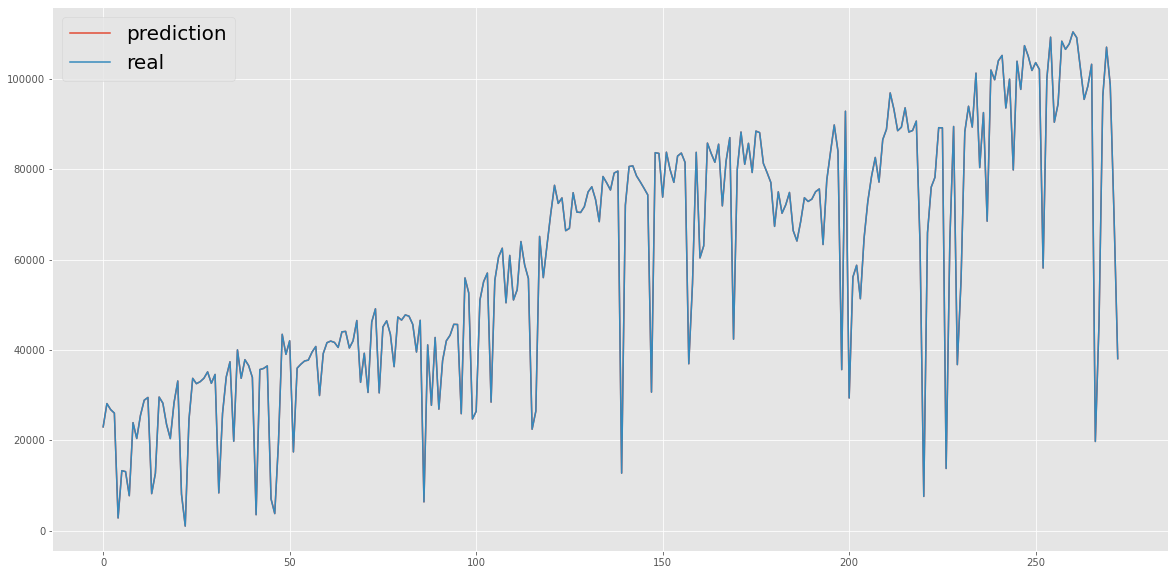

In [72]:
# 실제값 예측값 확인
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

----

In [74]:
submission = pd.read_csv('bicycle_dataset/sample_submission.csv')

In [75]:
test = pd.read_csv('bicycle_dataset/test.csv')

In [76]:
test.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
dtype: int64

In [37]:
year, month, day = seperate_datetime(test)

In [38]:
test['year'] = year
test['month'] = month
test['day'] = day

In [39]:
test_X = test.drop('date_time', axis = 1)

In [77]:
test_yhat = dt.predict(test_X)

In [78]:
submission['number_of_rentals'] = test_yhat

In [79]:
submission

,date_time,number_of_rentals
0,2021-04-01,65932.0
1,2021-04-02,65932.0
2,2021-04-03,35656.0
3,2021-04-04,63335.0
4,2021-04-05,70258.0
...,...,...
86,2021-06-26,90396.0
87,2021-06-27,107001.0
88,2021-06-28,103214.0
89,2021-06-29,103214.0


In [81]:
submission.to_csv('submission_bicycle.csv', index=False)